In [1]:
import pandas as pd
taxi_data = pd.read_csv("Data/Pre_Processed/processed_data.csv")

In [31]:
taxi_data

,vendor_id,trip_duration,distance,pickup_day,pickup_month,pickup_day_section,pickup_rush_hour
0,2,6.120297,0.404478,1,3,5,2
1,1,6.496775,0.590842,7,6,8,3
2,2,7.661056,1.853967,2,1,2,3
3,2,6.061457,0.395750,3,4,6,2
4,2,6.075346,0.172766,6,3,3,2
...,...,...,...,...,...,...,...
1240753,1,6.633318,1.263436,7,4,6,2
1240754,2,6.025866,0.840467,2,2,8,3
1240755,1,6.484635,1.800031,7,1,1,3
1240756,2,6.638568,2.057273,5,4,1,3


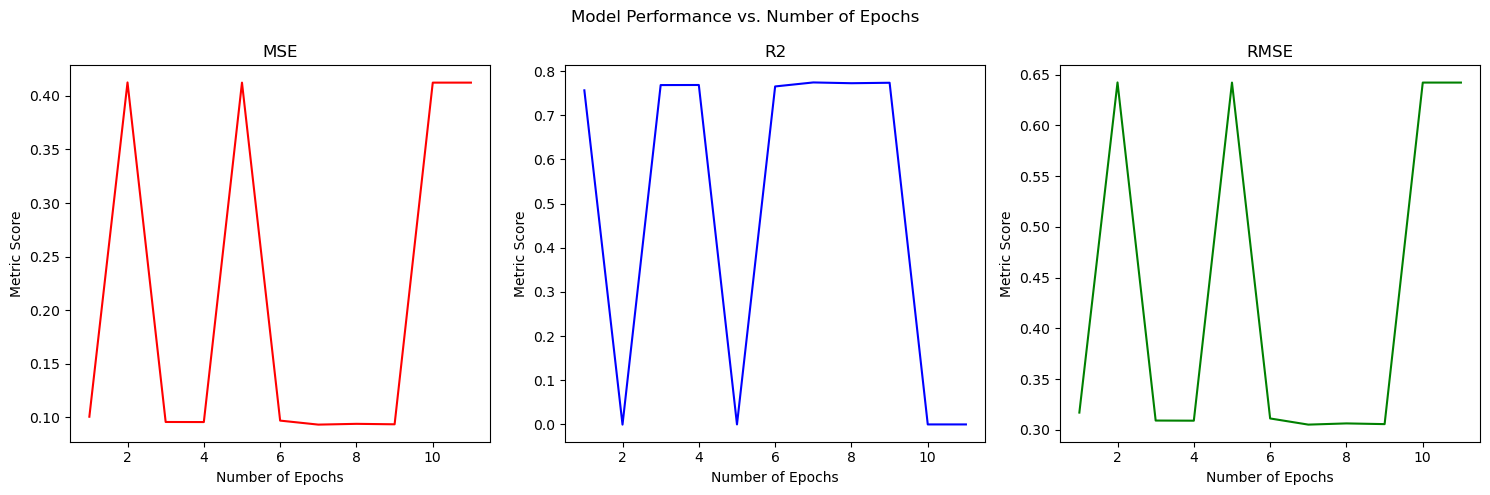

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(range(1, 12), mse_list, 'r')
axs[0].set_title('MSE')
axs[0].set_xlabel('Number of Epochs')
axs[0].set_ylabel('Metric Score')

axs[1].plot(range(1, 12), r2_list, 'b')
axs[1].set_title('R2')
axs[1].set_xlabel('Number of Epochs')
axs[1].set_ylabel('Metric Score')

axs[2].plot(range(1, 12), rmse_list, 'g')
axs[2].set_title('RMSE')
axs[2].set_xlabel('Number of Epochs')
axs[2].set_ylabel('Metric Score')

plt.suptitle('Model Performance vs. Number of Epochs')
plt.tight_layout()
plt.show()

Batch size hyper parametisation

Epoch 1/10
434265/434265 [==============================] - 843s 2ms/step - loss: 0.1056
Epoch 2/10
434265/434265 [==============================] - 800s 2ms/step - loss: 0.0969
Epoch 3/10
434265/434265 [==============================] - 832s 2ms/step - loss: 0.0963
Epoch 4/10
434265/434265 [==============================] - 1015s 2ms/step - loss: 0.0960
Epoch 5/10
434265/434265 [==============================] - 1014s 2ms/step - loss: 0.0959
Epoch 6/10
434265/434265 [==============================] - 990s 2ms/step - loss: 0.0956
Epoch 7/10
434265/434265 [==============================] - 961s 2ms/step - loss: 0.0955
Epoch 8/10
434265/434265 [==============================] - 1060s 2ms/step - loss: 0.0954
Epoch 9/10
434265/434265 [==============================] - 1081s 2ms/step - loss: 0.0953
Epoch 10/10
11633/11633 [==============================] - 22s 2ms/step
Epoch 1/10
217133/217133 [==============================] - 586s 3ms/step - loss: 0.1163
Epoch 2/10
217133/217133 [========

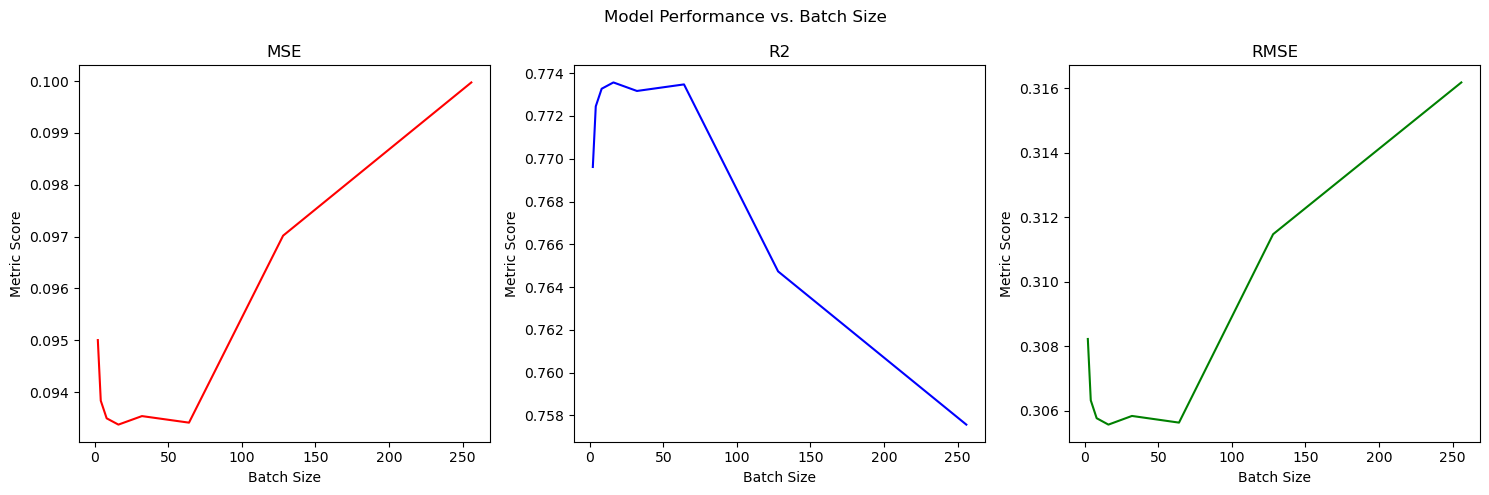

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(taxi_data.drop(['trip_duration'], axis=1), taxi_data['trip_duration'], test_size=0.3, random_state=42)
def create_model(batch_size):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=10, batch_size=batch_size)
    return model
mse_list = []
r2_list = []
rmse_list = []

batch_sizes = [4, 16, 32, 64, 128, 256]
for batch_size in batch_sizes:
    model = create_model(batch_size)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mse_list.append(mse)
    r2_list.append(r2)
    rmse_list.append(rmse)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(batch_sizes, mse_list, 'r')
axs[0].set_title('MSE')
axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Metric Score')
axs[1].plot(batch_sizes, r2_list, 'b')
axs[1].set_title('R2')
axs[1].set_xlabel('Batch Size')
axs[1].set_ylabel('Metric Score')
axs[2].plot(batch_sizes, rmse_list, 'g')
axs[2].set_title('RMSE')
axs[2].set_xlabel('Batch Size')
axs[2].set_ylabel('Metric Score')
plt.suptitle('Model Performance vs. Batch Size')
plt.tight_layout()
plt.show()


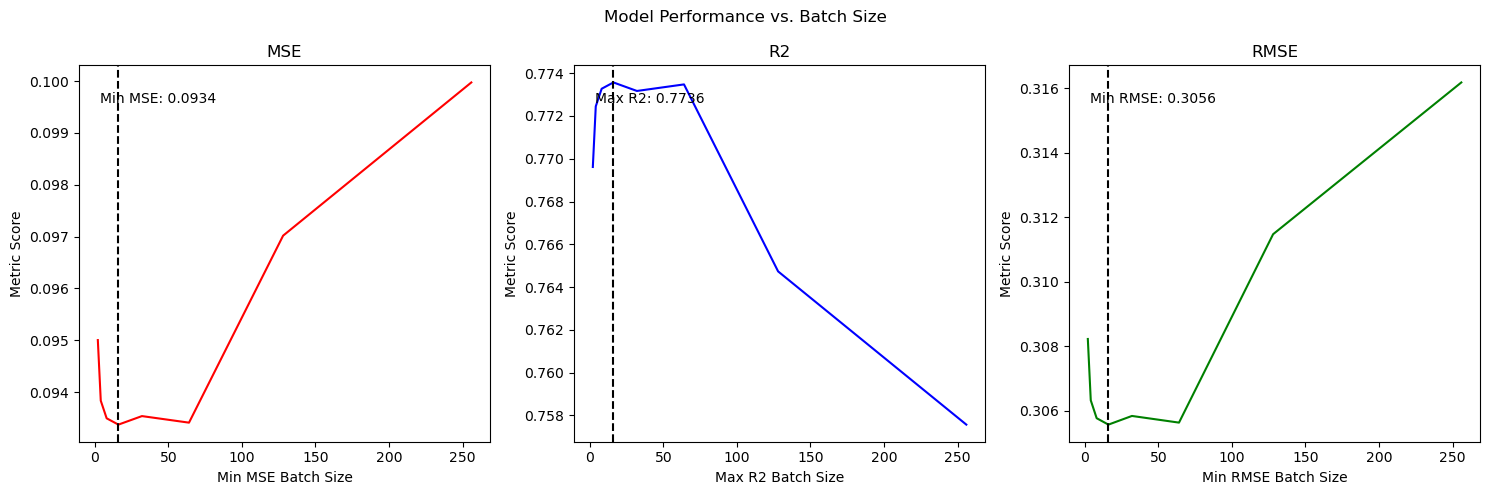

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
max_r2_index = np.argmax(r2_list)
max_r2_score = r2_list[max_r2_index]
min_mse_index = np.argmin(mse_list)
min_mse = mse_list[min_mse_index]
min_rmse_index = np.argmin(rmse_list)
min_rmse = rmse_list[min_rmse_index]
axs[0].plot(batch_sizes, mse_list, 'r')
axs[0].set_title('MSE')
axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Metric Score')
axs[0].axvline(x=batch_sizes[min_mse_index], color='k', linestyle='--')
axs[0].text(0.05, 0.9, f'Min MSE: {min_mse:.4f}', transform=axs[0].transAxes)
axs[0].set_xlabel('Min MSE Batch Size')
axs[1].plot(batch_sizes, r2_list, 'b')
axs[1].set_title('R2')
axs[1].set_xlabel('Batch Size')
axs[1].set_ylabel('Metric Score')
axs[1].axvline(x=batch_sizes[max_r2_index], color='k', linestyle='--')
axs[1].text(0.05, 0.9, f'Max R2: {max_r2_score:.4f}', transform=axs[1].transAxes)
axs[1].set_xlabel('Max R2 Batch Size')
axs[2].plot(batch_sizes, rmse_list, 'g')
axs[2].set_title('RMSE')
axs[2].set_xlabel('Batch Size')
axs[2].set_ylabel('Metric Score')
axs[2].axvline(x=batch_sizes[min_rmse_index], color='k', linestyle='--')
axs[2].text(0.05, 0.9, f'Min RMSE: {min_rmse:.4f}', transform=axs[2].transAxes)
axs[2].set_xlabel('Min RMSE Batch Size')
plt.suptitle('Model Performance vs. Batch Size')
plt.tight_layout()
plt.show()

Batch size = 16 best size

K fold for best model

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError
k = 10
kf = KFold(n_splits=k, random_state=42, shuffle=True)
r2_scores = []
mses = []
for train_index, test_index in kf.split(taxi_data):
    X_train, X_test = taxi_data.iloc[train_index].drop(['trip_duration'], axis=1), taxi_data.iloc[test_index].drop(['trip_duration'], axis=1)
    y_train, y_test = taxi_data.iloc[train_index]['trip_duration'], taxi_data.iloc[test_index]['trip_duration']
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=7, batch_size=16)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)s
    r2_scores.append(r2)
    mses.append(mse)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_mse = np.mean(mses)
std_mse = np.std(mses)
print('Mean R2 score:', mean_r2)
print('Standard deviation of R2 scores:', std_r2)
print('Mean MSE:', mean_mse)
print('Standard deviation of MSEs:', std_mse)

Epoch 1/7
69793/69793 [==============================] - 143s 2ms/step - loss: 0.1309
Epoch 2/7
69793/69793 [==============================] - 208s 3ms/step - loss: 0.0965
Epoch 3/7
69793/69793 [==============================] - 207s 3ms/step - loss: 0.0950
Epoch 4/7
69793/69793 [==============================] - 208s 3ms/step - loss: 0.0943
Epoch 5/7
69793/69793 [==============================] - 207s 3ms/step - loss: 0.0938
Epoch 6/7
69793/69793 [==============================] - 210s 3ms/step - loss: 0.0935
Epoch 7/7
3878/3878 [==============================] - 10s 2ms/step
Epoch 1/7
69793/69793 [==============================] - 215s 3ms/step - loss: 0.1334
Epoch 2/7
69793/69793 [==============================] - 213s 3ms/step - loss: 0.0962
Epoch 3/7
69793/69793 [==============================] - 215s 3ms/step - loss: 0.0948
Epoch 4/7
69793/69793 [==============================] - 210s 3ms/step - loss: 0.0940
Epoch 5/7
69793/69793 [==============================] - 210s 3ms/step -

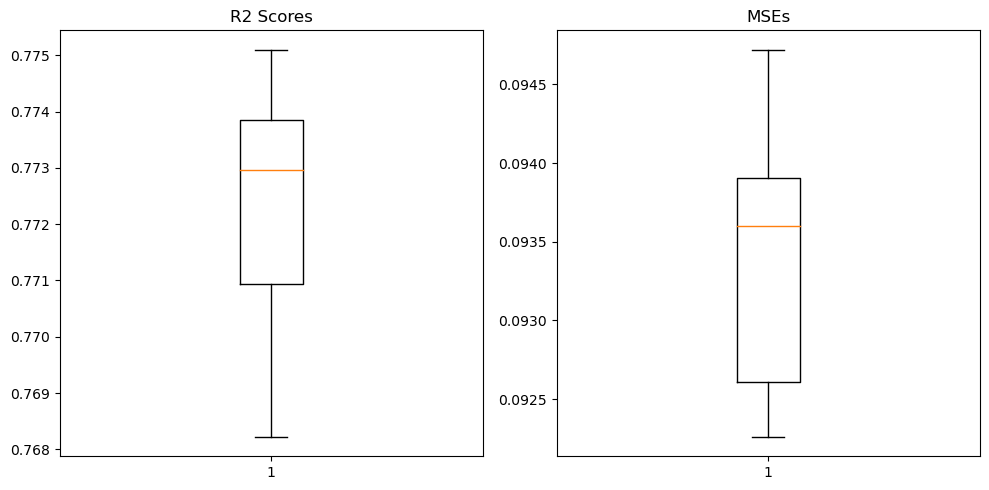

In [30]:
import matplotlib.pyplot as plt
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mses)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(r2_scores)
axs[0].set_title('R2 Scores')
axs[1].boxplot(mses)
axs[1].set_title('MSEs')
fig.tight_layout()
plt.show()

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
%pip install pydo

     -------------------------------------- 833.9/833.9 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 85.4/85.4 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 135.5/135.5 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 41.7/41.7 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 174.5/174.5 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 89.9/89.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
